In [270]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore") 

from sklearn.preprocessing import LabelEncoder, StandardScaler

# Input data files are available in the read-only "../input/" directory
# For example, running this will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# other libraries, dependencies, ect....



### Loading and Initial Data Exploration

In [271]:
train_data = pd.read_csv("train.csv")
train_data.drop('id', axis=1, inplace=True)
test_data = pd.read_csv("test.csv")
test_data.drop('id', axis=1, inplace=True)
train_data.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,yes,adult,530001,38.1,132,24,cool,reduced,dark_cyanotic,more_3_sec,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,yes,adult,533836,37.5,88,12,cool,normal,pale_cyanotic,more_3_sec,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,yes,adult,529812,38.3,120,28,cool,reduced,pale_pink,less_3_sec,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,yes,adult,5262541,37.1,72,30,cold,reduced,pale_pink,more_3_sec,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,no,adult,5299629,38.0,52,48,normal,normal,normal_pink,less_3_sec,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


Notes on data:

- id: standard ID value
- surgery: Yes or No of whether the horse in question received surgery
- age: Either Adult or Young
- hospital_number: number ID of hospital the horse attended
- rectal_temp: Temperature taken, details on to how self explanatory lol
- pulse: heart rate
- respiratory_rate: breathing rate
- temp_of_extremities: Cool, Normal, or other
- peripheral pulse: Reduced, Normal, or other
- mucous_membrane: color of mucous membrane
- capillary_refill_time: less then 3 sec, more then 3 sec, other
- pain: expression of amount of pain horse could be in
- peristalsis: hypomotile, absent, other. (apparently peristalsis is the wave like muscle contraction of the digestive tract, who knew! Vets in this case I assume)
- abdominal_distention: Abdominal swelling
- nasogastric_tube: according to google: It is used by a vet to identify if there are any abnormal contents in the horse's stomach, and to administer fluids and some treatments directly into the stomach. 
- nasogastric_reflux: Fluid or gas build-up in the stomach
- nasogastric_reflux_ph: ph level of nasogastric fluid
- rectal_exam_feces: measure of feces during rectal exam
- abdomen: small, large, normal, ect...
- packed_cell_volume: score for composition of blood cells
- total_protein: number value
- abdomo_apperance: color of fluid
- abdomo_protein: number value
- surgical_lesion: true or false
- lesion_1: number value
- lesion_2: number value
- lesion_3: number value
- cp_data: true or false
- outcome: lived, died, euthanized

### Missing Data



In [272]:
# Finding null/na values if there are any
null_vals = train_data.isna().sum().sort_values(ascending=False)
null_vals.head


<bound method NDFrame.head of nasogastric_tube         355
nasogastric_reflux       352
abdominal_distention     235
abdomen                  213
rectal_exam_feces        190
peripheral_pulse          60
abdomo_appearance         48
pain                      44
temp_of_extremities       39
mucous_membrane           21
peristalsis               20
capillary_refill_time      6
total_protein              0
lesion_1                   0
lesion_2                   0
surgical_lesion            0
abdomo_protein             0
lesion_3                   0
cp_data                    0
surgery                    0
packed_cell_volume         0
nasogastric_reflux_ph      0
age                        0
respiratory_rate           0
pulse                      0
rectal_temp                0
hospital_number            0
outcome                    0
dtype: int64>

All the missing columns are categorical, so we can use imputation to fill missing values.

In [273]:
# Hospital number is categorical even though represented as a integer, below corrects this
train_data['hospital_number'] = train_data['hospital_number'].astype('object')
test_data['hospital_number'] = test_data['hospital_number'].astype('object')

In [274]:
# Scaler for numerical data

scaler = StandardScaler()
object_columns = train_data.select_dtypes(include=['object'])
number_columns = train_data.select_dtypes(exclude=['object'])
train_data.loc[:,list(number_columns.columns)] = scaler.fit_transform(train_data.loc[:,list(number_columns.columns)])
test_data.loc[:,list(number_columns.columns)] = scaler.transform(test_data.loc[:,list(number_columns.columns)])

In [275]:
train_data.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,yes,adult,530001,-0.129621,1.801773,-0.368142,cool,reduced,dark_cyanotic,more_3_sec,...,0.702421,-0.483319,serosanguious,0.068659,yes,-0.298737,-0.075465,-0.040275,no,died
1,yes,adult,533836,-0.890705,0.289582,-1.097830,cool,normal,pale_cyanotic,more_3_sec,...,-1.576449,1.598010,serosanguious,-0.812647,yes,-0.298921,-0.075465,-0.040275,no,euthanized
2,yes,adult,529812,0.124074,1.389357,-0.124913,cool,reduced,pale_pink,less_3_sec,...,-1.196638,-0.562072,serosanguious,0.068659,yes,0.237648,-0.075465,-0.040275,no,lived
3,yes,adult,5262541,-1.398095,-0.260306,-0.003299,cold,reduced,pale_pink,more_3_sec,...,0.322609,-0.539571,cloudy,0.383411,yes,-0.298921,-0.075465,-0.040275,yes,lived
4,no,adult,5299629,-0.256468,-0.947666,1.091232,normal,normal,normal_pink,less_3_sec,...,-0.247108,-0.528321,cloudy,-0.434944,no,-0.705212,-0.075465,-0.040275,yes,lived


In [276]:
train_data.describe(include=['O'])

,surgery,age,hospital_number,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,surgical_lesion,cp_data,outcome
count,1235,1235,1235,1196,1175,1214,1229,1191,1215,1000,880,883,1045,1022,1187,1235,1235,1235
unique,2,2,255,4,4,6,3,6,5,3,2,3,5,5,3,2,2,3
top,yes,adult,529461,cool,reduced,pale_pink,less_3_sec,depressed,hypomotile,moderate,slight,more_1_liter,absent,distend_small,serosanguious,yes,yes,lived
freq,887,1160,46,700,724,284,834,429,664,543,758,604,493,482,570,929,668,574


In [277]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                1235 non-null   object 
 1   age                    1235 non-null   object 
 2   hospital_number        1235 non-null   object 
 3   rectal_temp            1235 non-null   float64
 4   pulse                  1235 non-null   float64
 5   respiratory_rate       1235 non-null   float64
 6   temp_of_extremities    1196 non-null   object 
 7   peripheral_pulse       1175 non-null   object 
 8   mucous_membrane        1214 non-null   object 
 9   capillary_refill_time  1229 non-null   object 
 10  pain                   1191 non-null   object 
 11  peristalsis            1215 non-null   object 
 12  abdominal_distention   1000 non-null   object 
 13  nasogastric_tube       880 non-null    object 
 14  nasogastric_reflux     883 non-null    object 
 15  naso

The following missing values will be replaced using imputation with the most common values

- temp_of_extremities - replace value: cool
- peripheral pulse - replace value: reduced
- mucous_membrane - replace value: pale_pink
- capillary_refill_time - replace value: less_3_sec
- pain - replace value: depressed
- peristalsis - replace value: hypomotile
- nasogastric_tube - replace value: slight
- nasogastric_reflux - replace value: more_1_liter
- abdomo_apperance - replace value: serosanguious

This will need to be filled by other means

- abdominal_distention
- rectal_exam_feces
- abdomen

In [278]:
# Replace na values imputation
train_data.fillna({'temp_of_extremities': 'cool', 
                   'peripheral_pulse': 'reduced',
                   'mucous_membrane': 'pale_pink',
                   'capillary_refill_time': 'less_3_sec',
                   'pain': 'depressed',
                   'peristalsis': 'hypomotile',
                   'nasogastric_tube': 'slight',
                   'nasogastric_reflux': 'more_1_liter',
                   'abdomo_appearance': 'serosanguious',
                   }, inplace=True)

test_data.fillna({'temp_of_extremities': 'cool', 
                   'peripheral_pulse': 'reduced',
                   'mucous_membrane': 'pale_pink',
                   'capillary_refill_time': 'less_3_sec',
                   'pain': 'depressed',
                   'peristalsis': 'hypomotile',
                   'nasogastric_tube': 'slight',
                   'nasogastric_reflux': 'more_1_liter',
                   'abdomo_appearance': 'serosanguious',
                   }, inplace=True)

In [279]:
train_data.describe(include=['O'])

,surgery,age,hospital_number,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,surgical_lesion,cp_data,outcome
count,1235,1235,1235,1235,1235,1235,1235,1235,1235,1000,1235,1235,1045,1022,1235,1235,1235,1235
unique,2,2,255,4,4,6,3,6,5,3,2,3,5,5,3,2,2,3
top,yes,adult,529461,cool,reduced,pale_pink,less_3_sec,depressed,hypomotile,moderate,slight,more_1_liter,absent,distend_small,serosanguious,yes,yes,lived
freq,887,1160,46,739,784,305,840,473,684,543,1113,956,493,482,618,929,668,574


In [280]:
"""
The following could be used to drop the remaining rows with NaN data

train_data.dropna(inplace=True)
train_data.shape

However this results in a shape of (755,28) meaning 480 rows are dropped, 
and in this case that is far to many to achieve accurate results

"""

'\nThe following could be used to drop the remaining rows with NaN data\n\ntrain_data.dropna(inplace=True)\ntrain_data.shape\n\nHowever this results in a shape of (755,28) meaning 480 rows are dropped, \nand in this case that is far to many to achieve accurate results\n\n'

In [281]:
# Using ffill method - this method will fill any NA values with the result of the one which recurred previously

train_data['abdomen'] = train_data['abdomen'].fillna(method='ffill')
train_data['rectal_exam_feces'] = train_data['rectal_exam_feces'].fillna(method='ffill')
train_data['abdominal_distention'] = train_data['abdominal_distention'].fillna(method='ffill')

train_data.describe(include=['O'])

,surgery,age,hospital_number,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,surgical_lesion,cp_data,outcome
count,1235,1235,1235,1235,1235,1235,1235,1235,1235,1235,1235,1235,1235,1235,1235,1235,1235,1235
unique,2,2,255,4,4,6,3,6,5,3,2,3,5,5,3,2,2,3
top,yes,adult,529461,cool,reduced,pale_pink,less_3_sec,depressed,hypomotile,moderate,slight,more_1_liter,absent,distend_small,serosanguious,yes,yes,lived
freq,887,1160,46,739,784,305,840,473,684,662,1113,956,584,574,618,929,668,574


In [282]:
# Using ffill method for test data

test_data['abdomen'] = test_data['abdomen'].fillna(method='ffill')
test_data['rectal_exam_feces'] = test_data['rectal_exam_feces'].fillna(method='ffill')
test_data['abdominal_distention'] = test_data['abdominal_distention'].fillna(method='ffill')

test_data.describe(include=['O'])

,surgery,age,hospital_number,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,surgical_lesion,cp_data
count,824,824,824,824,824,824,824,824,824,824,824,824,824,824,824,824,824
unique,2,2,210,4,4,6,3,6,4,3,2,2,4,5,3,2,2
top,yes,adult,529461,cool,reduced,pale_cyanotic,less_3_sec,depressed,hypomotile,moderate,slight,more_1_liter,absent,distend_small,serosanguious,yes,yes
freq,589,782,35,507,525,212,530,339,466,437,749,612,401,375,418,619,440


In [283]:
# Finds all categorical columns (with text values)
categorical_cols = train_data.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('hospital_number')
categorical_cols.remove('outcome')
print(categorical_cols)

['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'surgical_lesion', 'cp_data']


In [284]:
# Finds unique values in each
for column in categorical_cols:
    print(len(train_data[column].unique()))

2
2
4
4
6
3
6
5
3
2
3
5
5
3
2
2


As no values are higher then 15 unique we can use one-hot encoding for our columns

In [285]:
# one hot encoding, get dummies (train data)

enc_train_data = pd.get_dummies(train_data, columns= categorical_cols)
enc_train_data.head()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,...,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_no,surgical_lesion_yes,cp_data_no,cp_data_yes
0,530001,-0.129621,1.801773,-0.368142,1.093380,0.702421,-0.483319,0.068659,-0.298737,-0.075465,...,0,0,0,0,0,1,0,1,1,0
1,533836,-0.890705,0.289582,-1.097830,-1.230314,-1.576449,1.598010,-0.812647,-0.298921,-0.075465,...,0,0,0,0,0,1,0,1,1,0
2,529812,0.124074,1.389357,-0.124913,-0.455749,-1.196638,-0.562072,0.068659,0.237648,-0.075465,...,0,0,0,0,0,1,0,1,1,0
3,5262541,-1.398095,-0.260306,-0.003299,-1.230314,0.322609,-0.539571,0.383411,-0.298921,-0.075465,...,0,0,0,0,1,0,0,1,0,1
4,5299629,-0.256468,-0.947666,1.091232,1.351568,-0.247108,-0.528321,-0.434944,-0.705212,-0.075465,...,0,1,0,0,1,0,1,0,0,1


In [286]:
# one hot encoding, get dummies (test data)

enc_test_data = pd.get_dummies(test_data, columns= categorical_cols)
enc_test_data.head()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,...,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_no,surgical_lesion_yes,cp_data_no,cp_data_yes
0,534053,0.504617,-1.360082,-0.611371,1.351568,-0.721873,-0.520820,-0.623795,-0.705212,-0.075465,...,0,0,0,1,0,0,1,0,1,0
1,528469,-0.002773,1.114413,1.091232,-0.455749,-0.531967,-0.577073,-0.434944,-0.298921,-0.075465,...,0,0,0,0,0,1,1,0,0,1
2,528178,-0.637011,-0.466514,-1.097830,-0.713937,-1.718879,-0.577073,-1.064448,-0.299473,-0.075465,...,0,0,0,0,1,0,0,1,0,1
3,534784,-1.398095,0.289582,-0.611371,-1.230314,2.411574,2.235535,-1.442151,-0.447600,-0.075465,...,0,0,0,0,0,1,0,1,1,0
4,529840,0.124074,-1.016402,-1.097830,-0.713937,-1.196638,-0.547071,-0.434944,-0.298921,-0.075465,...,0,0,0,0,1,0,0,1,0,1


Test data = 65 columns
Train data = 69 columns

We need to find why there is a 4 column difference

In [287]:
# iterate train data, Uncomment to acces

#for col in enc_train_data:
#    print(col)

In [288]:
# iterate test data, Uncomment to acces

#for col in enc_test_data:
#    print(col)

After comparing the two I have found that the Test Dataset is missing rectal_exam_feces_serosanguious, nasogastric_reflux_slight, peristalsis_distend_small, pain_slight. (Outcome is missing as well but this is to be expected)

The Train dataset is missing pain_moderate.

I can assume thn that as they are missing they resulted in Null Values, with this in mind they can be added to the datasets with a value of '0' in its place to ensure data accuracy.

In [289]:
# Adds missing columns 

enc_train_data.insert(37, "pain_moderate", 0)

enc_test_data.insert(38, "pain_slight", 0)
enc_test_data.insert(40, "peristalsis_distend_small", 0)
enc_test_data.insert(51, "nasogastric_reflux_slight", 0)
enc_test_data.insert(56, "rectal_exam_feces_serosanguious", 0)


In [290]:
# iterate test data, Uncomment to acces

for col in enc_test_data:
    print(col)

hospital_number
rectal_temp
pulse
respiratory_rate
nasogastric_reflux_ph
packed_cell_volume
total_protein
abdomo_protein
lesion_1
lesion_2
lesion_3
surgery_no
surgery_yes
age_adult
age_young
temp_of_extremities_cold
temp_of_extremities_cool
temp_of_extremities_normal
temp_of_extremities_warm
peripheral_pulse_absent
peripheral_pulse_increased
peripheral_pulse_normal
peripheral_pulse_reduced
mucous_membrane_bright_pink
mucous_membrane_bright_red
mucous_membrane_dark_cyanotic
mucous_membrane_normal_pink
mucous_membrane_pale_cyanotic
mucous_membrane_pale_pink
capillary_refill_time_3
capillary_refill_time_less_3_sec
capillary_refill_time_more_3_sec
pain_alert
pain_depressed
pain_extreme_pain
pain_mild_pain
pain_moderate
pain_severe_pain
pain_slight
peristalsis_absent
peristalsis_distend_small
peristalsis_hypermotile
peristalsis_hypomotile
peristalsis_normal
abdominal_distention_moderate
abdominal_distention_severe
abdominal_distention_slight
nasogastric_tube_significant
nasogastric_tube_sli

In [291]:
# iterate train data, Uncomment to acces

for col in enc_train_data:
    print(col)

hospital_number
rectal_temp
pulse
respiratory_rate
nasogastric_reflux_ph
packed_cell_volume
total_protein
abdomo_protein
lesion_1
lesion_2
lesion_3
outcome
surgery_no
surgery_yes
age_adult
age_young
temp_of_extremities_cold
temp_of_extremities_cool
temp_of_extremities_normal
temp_of_extremities_warm
peripheral_pulse_absent
peripheral_pulse_increased
peripheral_pulse_normal
peripheral_pulse_reduced
mucous_membrane_bright_pink
mucous_membrane_bright_red
mucous_membrane_dark_cyanotic
mucous_membrane_normal_pink
mucous_membrane_pale_cyanotic
mucous_membrane_pale_pink
capillary_refill_time_3
capillary_refill_time_less_3_sec
capillary_refill_time_more_3_sec
pain_alert
pain_depressed
pain_extreme_pain
pain_mild_pain
pain_moderate
pain_severe_pain
pain_slight
peristalsis_absent
peristalsis_distend_small
peristalsis_hypermotile
peristalsis_hypomotile
peristalsis_normal
abdominal_distention_moderate
abdominal_distention_severe
abdominal_distention_slight
nasogastric_tube_significant
nasogastric_

In [292]:
enc_train_data.head()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,...,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_no,surgical_lesion_yes,cp_data_no,cp_data_yes
0,530001,-0.129621,1.801773,-0.368142,1.093380,0.702421,-0.483319,0.068659,-0.298737,-0.075465,...,0,0,0,0,0,1,0,1,1,0
1,533836,-0.890705,0.289582,-1.097830,-1.230314,-1.576449,1.598010,-0.812647,-0.298921,-0.075465,...,0,0,0,0,0,1,0,1,1,0
2,529812,0.124074,1.389357,-0.124913,-0.455749,-1.196638,-0.562072,0.068659,0.237648,-0.075465,...,0,0,0,0,0,1,0,1,1,0
3,5262541,-1.398095,-0.260306,-0.003299,-1.230314,0.322609,-0.539571,0.383411,-0.298921,-0.075465,...,0,0,0,0,1,0,0,1,0,1
4,5299629,-0.256468,-0.947666,1.091232,1.351568,-0.247108,-0.528321,-0.434944,-0.705212,-0.075465,...,0,1,0,0,1,0,1,0,0,1


In [293]:
enc_test_data.head()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,...,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_no,surgical_lesion_yes,cp_data_no,cp_data_yes
0,534053,0.504617,-1.360082,-0.611371,1.351568,-0.721873,-0.520820,-0.623795,-0.705212,-0.075465,...,0,0,0,1,0,0,1,0,1,0
1,528469,-0.002773,1.114413,1.091232,-0.455749,-0.531967,-0.577073,-0.434944,-0.298921,-0.075465,...,0,0,0,0,0,1,1,0,0,1
2,528178,-0.637011,-0.466514,-1.097830,-0.713937,-1.718879,-0.577073,-1.064448,-0.299473,-0.075465,...,0,0,0,0,1,0,0,1,0,1
3,534784,-1.398095,0.289582,-0.611371,-1.230314,2.411574,2.235535,-1.442151,-0.447600,-0.075465,...,0,0,0,0,0,1,0,1,1,0
4,529840,0.124074,-1.016402,-1.097830,-0.713937,-1.196638,-0.547071,-0.434944,-0.298921,-0.075465,...,0,0,0,0,1,0,0,1,0,1


In [294]:
# Selecting Datasets

final_train_X = enc_train_data.drop('outcome', axis=1)
final_train_y = enc_train_data['outcome']

final_test_X = enc_test_data

final_train_X.shape, final_train_y.shape, final_test_X.shape,

((1235, 69), (1235,), (824, 69))

In [295]:
# Importing Classifier Modules/Models
from sklearn.linear_model import LogisticRegression

# Logisitic Regression Model
model = LogisticRegression()
model.fit(final_train_X, final_train_y)
y_pred_log_reg = model.predict(final_test_X)
acc_log_reg = round( model.score(final_train_X, final_train_y) * 100, 2)
print ("Train Accuracy: " + str(acc_log_reg) + '%')

Train Accuracy: 46.48%


In [296]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Model
model = DecisionTreeClassifier()
model.fit(final_train_X, final_train_y)
y_pred_decision_tree = model.predict(final_test_X)
acc_decision_tree = round(model.score(final_train_X, final_train_y) * 100, 2)
print ("Train Accuracy: " + str(acc_decision_tree) + '%')
display(model.feature_importances_)

Train Accuracy: 100.0%


array([7.16474788e-02, 6.19475536e-02, 1.44265931e-01, 4.89930100e-02,
       4.27990683e-02, 5.76441647e-02, 1.59266355e-01, 5.01735414e-02,
       6.20710441e-02, 0.00000000e+00, 0.00000000e+00, 1.12645007e-02,
       0.00000000e+00, 6.58543250e-03, 0.00000000e+00, 1.05035263e-02,
       3.62589440e-03, 2.98727273e-03, 5.05206776e-03, 0.00000000e+00,
       0.00000000e+00, 9.45026575e-03, 1.28025974e-03, 6.93830698e-03,
       9.55114411e-04, 4.63789333e-03, 6.20326202e-03, 9.88170853e-03,
       3.55627706e-03, 0.00000000e+00, 9.81532469e-03, 0.00000000e+00,
       3.36412868e-03, 0.00000000e+00, 1.90304334e-02, 1.17649832e-02,
       0.00000000e+00, 3.42983779e-02, 0.00000000e+00, 3.11529871e-03,
       0.00000000e+00, 0.00000000e+00, 5.37709092e-03, 1.59211788e-03,
       4.50552948e-03, 0.00000000e+00, 1.27847770e-02, 0.00000000e+00,
       0.00000000e+00, 4.89343724e-03, 6.69346055e-03, 0.00000000e+00,
       6.78031322e-03, 6.18487385e-03, 1.43512987e-04, 6.97442153e-03,
      

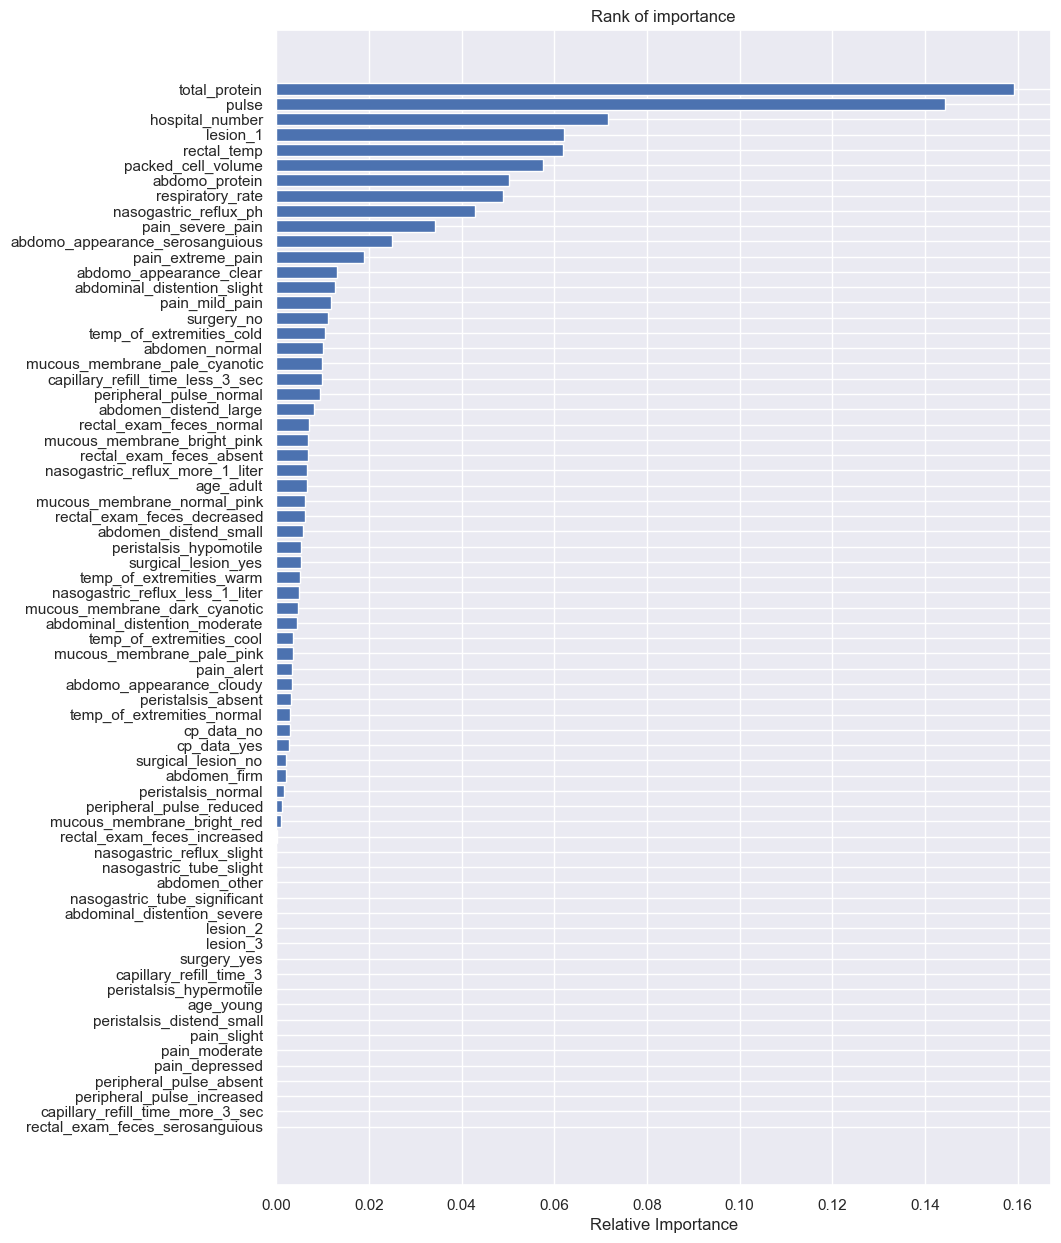

In [297]:
# Plot features based on importance
features = final_train_X.columns
importances = model.feature_importances_
indices = np.argsort(importances)[:]

fig , ax = plt.subplots(figsize = (10,15))

plt.title('Rank of importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [298]:
# features with low scores
bad_features = ['rectal_exam_feces_increased', 'peripheral_pulse_absent', 'nasogastric_reflux_slight', 'nasogastric_tube_slight', 'abdomen_other', 'abdominal_distention_severe', 'peristalsis_normal', 'lesion_2', 'temp_of_extremities_normal', 'lesion_3', 'peristalsis_hypermotile', 'peristalsis_distend_small', 'pain_slight', 'pain_moderate', 'capillary_refill_time_3', 'peripheral_pulse_increased', 'rectal_exam_feces_serosanguious']

In [299]:
# drop features then retrain
final_train_X.drop(bad_features, axis=1)
final_test_X.drop(bad_features, axis=1)

# Decision Tree Model
model = DecisionTreeClassifier()
model.fit(final_train_X, final_train_y)
y_pred_decision_tree = model.predict(final_test_X)
acc_decision_tree = round(model.score(final_train_X, final_train_y) * 100, 2)
print ("Train Accuracy: " + str(acc_decision_tree) + '%')

Train Accuracy: 100.0%


In [300]:
from sklearn.svm import SVC, LinearSVC

# Support Vector Machines (SVC) Model
model = SVC()
model.fit(final_train_X, final_train_y)
y_pred_svc = model.predict(final_test_X)
acc_svc = round(model.score(final_train_X, final_train_y) * 100, 2)
print ("Train Accuracy: " + str(acc_svc) + '%')

# Linear SVC Model
model = LinearSVC()
model.fit(final_train_X, final_train_y)
y_pred_linear_svc = model.predict(final_test_X)
acc_linear_svc = round(model.score(final_train_X, final_train_y) * 100, 2)
print ("Train Accuracy: " + str(acc_linear_svc) + '%')

Train Accuracy: 47.94%
Train Accuracy: 33.2%


In [301]:
from sklearn.neighbors import KNeighborsClassifier

# k-Nearest Neighbor (KNN) Model
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(final_train_X, final_train_y)
y_pred_knn = model.predict(final_test_X)
acc_knn = round(model.score(final_train_X, final_train_y) * 100, 2)
print ("Train Accuracy: " + str(acc_knn) + '%')

Train Accuracy: 76.84%


### Neural Network

In [302]:
final_train_X.shape

(1235, 69)

In [303]:
import tensorflow as tf

nn = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=69,),
    tf.keras.layers.Dense(units=16, activation="relu"),
    tf.keras.layers.Dense(units=8, activation="relu"),
    tf.keras.layers.Dense(units=3, activation="sigmoid"),
])

nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                1120      
                                                                 
 dense_13 (Dense)            (None, 8)                 136       
                                                                 
 dense_14 (Dense)            (None, 3)                 27        
                                                                 
Total params: 1283 (5.01 KB)
Trainable params: 1283 (5.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [304]:
import torch 
torch_train_X = torch.tensor(final_train_X)
torch_train_y = torch.tensor(final_train_y)
torch_test_X = torch.tensor(final_test_X)

nn.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' ,metrics= ['accuracy'])
nn.fit(final_train_X, final_train_y)

ValueError: could not determine the shape of object type 'DataFrame'

In [ ]:
#creates submission

final_test_X.insert(0, 'id', range(1235, 1235 + len(final_test_X)))
my_submission = pd.DataFrame({"id":final_test_X['id'], "outcome": y_pred_knn})

my_submission.to_csv('sample_submission.csv', index=False)